<a href="https://colab.research.google.com/github/sprashant19/Task/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT 7

Salary Discrimination

The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1.Sex. 1 for female, 0 for male.

2.Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.

3.Year. Number of years in current rank.

4.Degree. Highest degree. 1 for doctorate, 0 for master's.

5.YSdeg. Years since highest degree was earned.

6.Salary. Salary/year in dollars.

Tasks

1.Find the linear regression equation for this data using columns 1-5 to column 6.

2.Find the selection of columns with the best  R2  score.

3.Report whether sex is a factor in salary.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

Exploratory Data Analysis

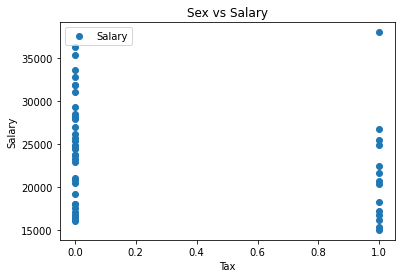

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
df.plot(x="Sex",y='Salary',style='o')
plt.title("Sex vs Salary")
plt.xlabel('Tax')
plt.ylabel('Salary')
plt.show()
df[["Sex","Salary"]].corr()

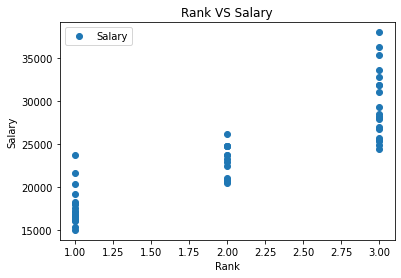

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
df.plot(x="Rank",y="Salary",style='o')
plt.title("Rank VS Salary")
plt.xlabel("Rank")
plt.ylabel("Salary")
plt.show()
df[['Rank','Salary']].corr()

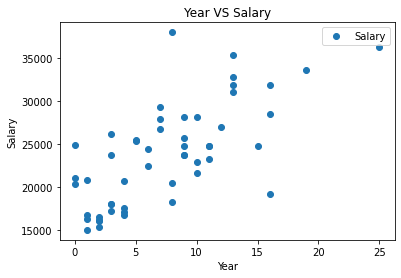

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
df.plot(x="Year",y="Salary",style='o')
plt.title("Year VS Salary")
plt.xlabel("Year")
plt.ylabel("Salary")
plt.show()
df[['Year','Salary']].corr()

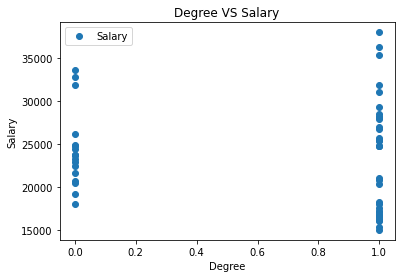

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df.plot(x="Degree",y="Salary",style='o')
plt.title("Degree VS Salary")
plt.xlabel("Degree")
plt.ylabel("Salary")
plt.show()
df[['Degree','Salary']].corr()

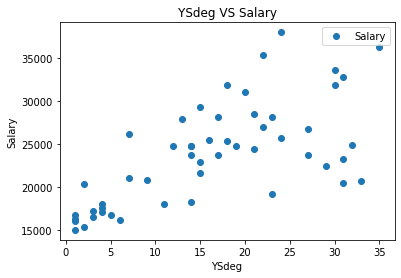

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.plot(x="YSdeg",y="Salary",style='o')
plt.title("YSdeg VS Salary")
plt.xlabel("YSdeg")
plt.ylabel("Salary")
plt.show()
df[['YSdeg','Salary']].corr()

Preparing the Data

In [ ]:
x=df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']].values
y=df['Salary'].values

Splitting the Data 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Scaling or Normalising the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()     #Initializing Scaling
scaler.fit(x_train,y_train)     #Calculate values of mu and sigma
x_train_scaled=scaler.transform(x_train)    #fit (mean and  sd ) and then transform the trainig data
x_test_scaled=scaler.transform(x_test)  #only transform the test dataset

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
coeff_df=pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'],columns=['Coefficient'])
y_pred=regressor.predict(x_test_scaled)
coeff_df

,Coefficient
Sex,477.505951
Rank,4663.425905
Year,2426.269626
Degree,125.360914
YSdeg,-496.033054


In [ ]:
regressor.intercept_

23655.90243902439

In [ ]:
dataset=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dataset

,Actual,Predicted
0,26182,21438.071793
1,17095,16907.551585
2,24750,26420.307923
3,22450,22765.454548
4,28200,29412.358800
5,21600,19807.126936
6,18075,16467.430709
7,23713,18364.913236
8,24800,24896.746490
9,33696,32772.357197


Evaluation Metrics

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("R2 Score:",metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1928.4910245651467
Mean Squared Error: 6650141.0773443375
R2 Score: 0.662315861487556


R2 Score of 0.66 depicts that the model is a good model.

Feature Selection

Repeated Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=1,step=1)
selector=selector.fit(x_train,y_train)
list(zip(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'],selector.support_))

[('Sex', False),
 ('Rank', True),
 ('Year', False),
 ('Degree', False),
 ('YSdeg', False)]

Linear Regression equation for above data is as follows:

1. Linear Regression Equation between "Rank" and "Salary" is : 

Predicted Salary = 4663.42*Rank + 23655.903

In [ ]:
df["Sex"]=df["Sex"].map({1:"Female",0:"Male"})
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,Male,3,25,1,35,36350
1,Male,3,13,1,22,35350
2,Male,3,10,1,23,28200
3,Female,3,7,1,27,26775
4,Male,3,19,0,30,33696
5,Male,3,16,1,21,28516
6,Female,3,0,0,32,24900
7,Male,3,16,1,18,31909
8,Male,3,13,0,30,31850
9,Male,3,13,0,31,32850


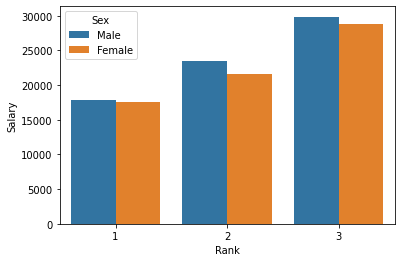

In [ ]:
import seaborn as sns
sns.barplot(x=df.Rank,y=df.Salary,hue=df.Sex,ci=None)


The above graph plotted between Salary and Rank depicts that Male are preferred more than Female in every rank.